In [1]:
%pip install pystan
%pip install prophet
%pip install pandas_datareader 


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\DELL\AppData\Local\Temp\pip-install-u5s4h10r\pystan_76bd823e732d436f932eca4017f5a621\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.



  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached aiohttp-3.8.3-cp310-cp310-win_amd64.whl (319 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'




In [3]:
# start  = dt.datetime(2020 , 1,1) 
# end  = dt.datetime.now()

In [4]:
# data = web.DataReader("TSLA" , "yahoo" ,start  ,end )
# data.to_csv("stock_data.csv")
# data = data[["Date" , "Close"]]
# data.columns = ["ds" , "y"] 

#Create csv from the actual stock prices   
#just change TSLA to AAPL  , i.e. tesla stocks to apple stocks 



In [14]:
import pandas_datareader as web  
import pandas as pd  
import datetime as dt 
from prophet import Prophet

In [15]:
data = pd.read_csv("example_wp_log_peyton_manning.csv")

In [16]:
data.tail()

,Unnamed: 0,ds,y
2900,2900,2016-01-16,7.817223
2901,2901,2016-01-17,9.273878
2902,2902,2016-01-18,10.333775
2903,2903,2016-01-19,9.125871
2904,2904,2016-01-20,8.891374


In [17]:
data = data[['ds' , 'y']]

In [18]:
data.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [19]:
m = Prophet() 
m.fit(data)

11:34:59 - cmdstanpy - INFO - Chain [1] start processing
11:35:00 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future  =m.make_future_dataframe(periods= 365) 
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [23]:
forecast = m.predict(future) 
forecast[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210268,7.503159,8.892113
3266,2017-01-16,8.535296,7.848444,9.228490
3267,2017-01-17,8.322712,7.613629,9.032073
3268,2017-01-18,8.155345,7.371924,8.935594
3269,2017-01-19,8.167304,7.418352,8.866083


In [28]:
forecast.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2020\3592369021.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  forecast.corr()


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
trend,1.000000,0.521902,0.505216,0.991883,0.991042,-0.030002,-0.030002,-0.030002,0.000990,0.000990,0.000990,-0.031903,-0.031903,-0.031903,NaN,NaN,NaN,0.514213
yhat_lower,0.521902,1.000000,0.998015,0.506939,0.527672,0.835977,0.835977,0.835977,0.267308,0.267308,0.267308,0.793015,0.793015,0.793015,NaN,NaN,NaN,0.999114
yhat_upper,0.505216,0.998015,1.000000,0.485872,0.515843,0.846520,0.846520,0.846520,0.268051,0.268051,0.268051,0.803872,0.803872,0.803872,NaN,NaN,NaN,0.999150
trend_lower,0.991883,0.506939,0.485872,1.000000,0.966026,-0.045036,-0.045036,-0.045036,0.000749,0.000749,0.000749,-0.047649,-0.047649,-0.047649,NaN,NaN,NaN,0.496930
trend_upper,0.991042,0.527672,0.515843,0.966026,1.000000,-0.014670,-0.014670,-0.014670,0.001238,0.001238,0.001238,-0.015844,-0.015844,-0.015844,NaN,NaN,NaN,0.522532
additive_terms,-0.030002,0.835977,0.846520,-0.045036,-0.014670,1.000000,1.000000,1.000000,0.312213,0.312213,0.312213,0.951062,0.951062,0.951062,NaN,NaN,NaN,0.841849
additive_terms_lower,-0.030002,0.835977,0.846520,-0.045036,-0.014670,1.000000,1.000000,1.000000,0.312213,0.312213,0.312213,0.951062,0.951062,0.951062,NaN,NaN,NaN,0.841849
additive_terms_upper,-0.030002,0.835977,0.846520,-0.045036,-0.014670,1.000000,1.000000,1.000000,0.312213,0.312213,0.312213,0.951062,0.951062,0.951062,NaN,NaN,NaN,0.841849
weekly,0.000990,0.267308,0.268051,0.000749,0.001238,0.312213,0.312213,0.312213,1.000000,1.000000,1.000000,0.003381,0.003381,0.003381,NaN,NaN,NaN,0.268428
weekly_lower,0.000990,0.267308,0.268051,0.000749,0.001238,0.312213,0.312213,0.312213,1.000000,1.000000,1.000000,0.003381,0.003381,0.003381,NaN,NaN,NaN,0.268428


In [24]:
import matplotlib.pyplot as plt 




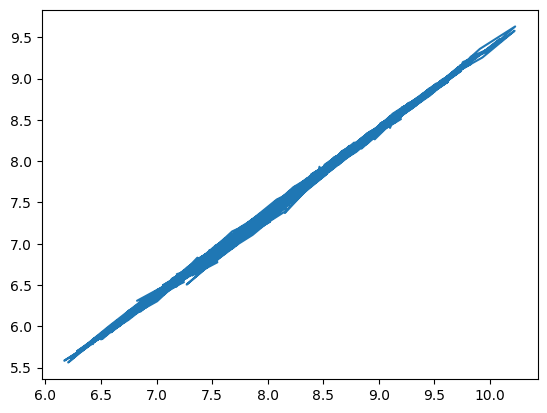

In [25]:
plt.plot(forecast.yhat , forecast.yhat_lower)  ; 

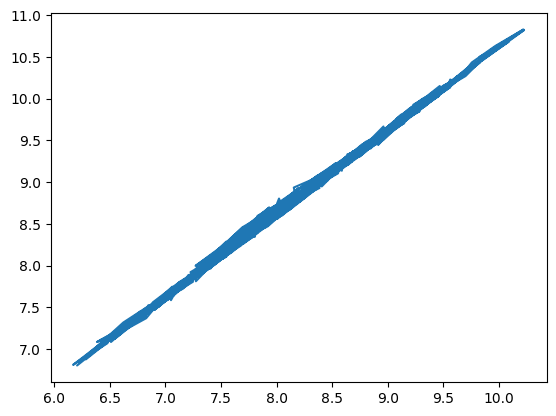

In [26]:
plt.plot(forecast.yhat , forecast.yhat_upper)  ; 

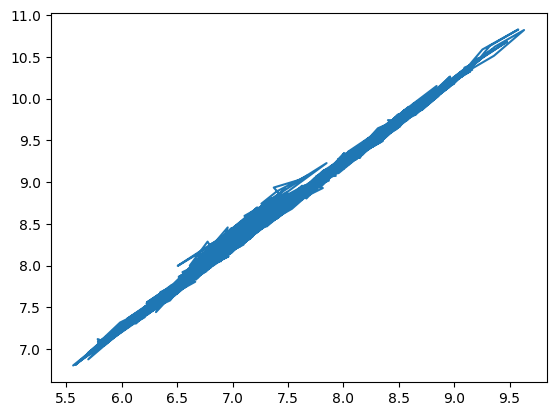

In [27]:
plt.plot(forecast.yhat_lower , forecast.yhat_upper)  ; 

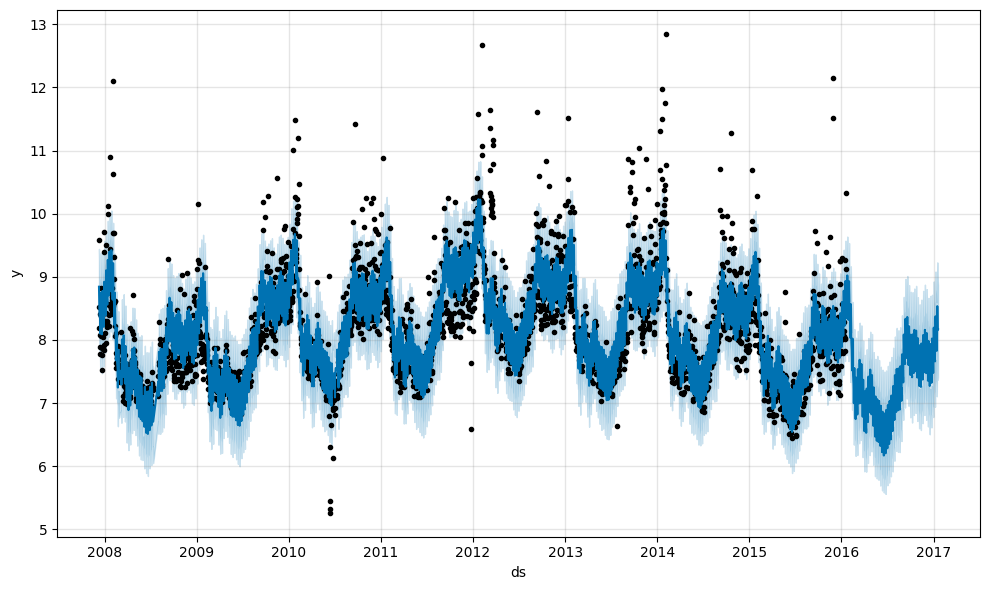

In [29]:
fig1 = m.plot(forecast)

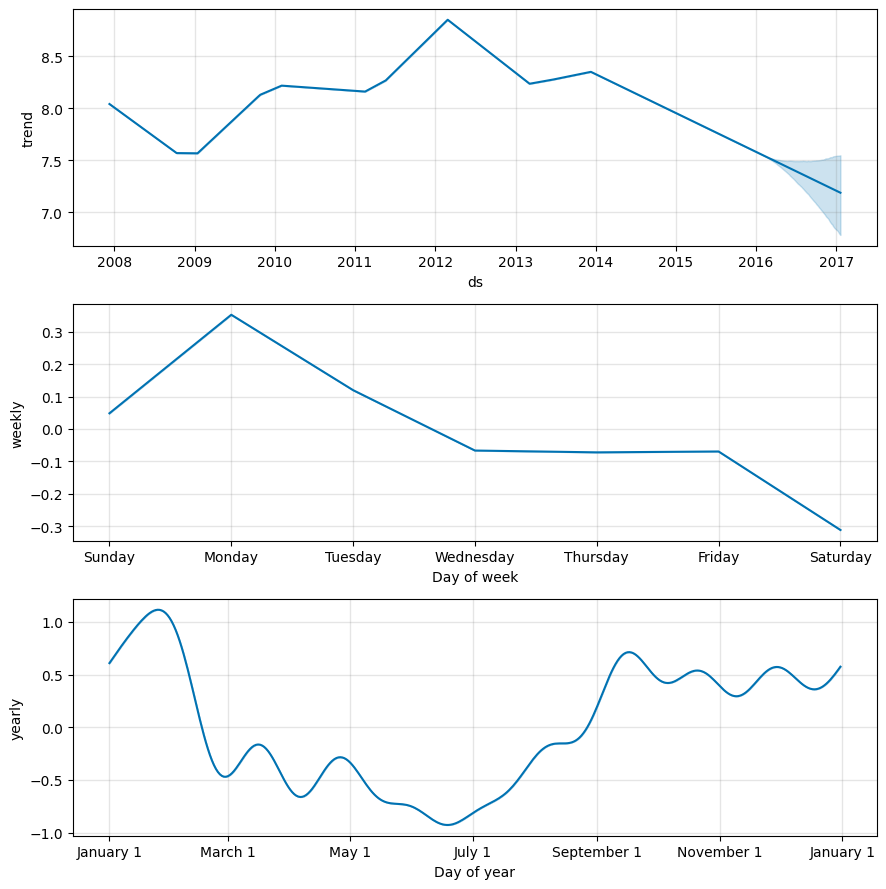

In [30]:
fig2 = m.plot_components(forecast)